In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications import vgg16
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
num_classes = 10

In [4]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [5]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [8]:
x_train.shape

(60000, 28, 28, 3)

In [9]:
x_train = tf.image.resize(x_train, [36,36])
x_test = tf.image.resize(x_test, [36,36])

In [10]:
x_train.shape

TensorShape([60000, 36, 36, 3])

In [11]:
x_train = x_train.numpy()
x_test = x_test.numpy()

In [12]:
x_train.shape

(60000, 36, 36, 3)

In [13]:
x_train = vgg16.preprocess_input(x_train)
x_test = vgg16.preprocess_input(x_test)

In [14]:
x_train.shape

(60000, 36, 36, 3)

In [15]:
x_train = np.array(x_train, dtype = 'float32') / 255.0
x_test = np.array(x_test, dtype = 'float32') / 255.0

In [16]:
x_train.shape

(60000, 36, 36, 3)

In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
base_model = vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    # input_tensor=tf.keras.Input(shape=(36,36,3)),
    input_shape=x_train[0].shape,
    # classes=num_classes,
    # classifier_activation="softmax",
)

58900480/58889256 [==============================] - 1s 0us/step


In [20]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 36, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 36, 36, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 36, 36, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 18, 18, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 18, 18, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 18, 18, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 9, 9, 128)         0     

In [21]:
nL = len(base_model.layers)
print(nL)

19


In [22]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)

In [23]:
model = Model(inputs = base_model.input, outputs = output)

In [24]:
for layer in base_model.layers[:nL - 1]:
    layer.trainable = False

In [25]:
model.compile(optimizer = 'Adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 36, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 36, 36, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 36, 36, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 18, 18, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 18, 18, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 18, 18, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 9, 9, 128)         0     

In [29]:
batch_size = 256
epochs = 10

In [30]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs,
                    verbose=1, validation_data = (x_test, y_test))

Epoch 1/10
235/235 [==============================] - 27s 104ms/step - loss: 0.0981 - accuracy: 0.9697 - val_loss: 0.1028 - val_accuracy: 0.9660
Epoch 2/10
235/235 [==============================] - 23s 100ms/step - loss: 0.0939 - accuracy: 0.9713 - val_loss: 0.0945 - val_accuracy: 0.9688
Epoch 3/10
235/235 [==============================] - 23s 96ms/step - loss: 0.0911 - accuracy: 0.9718 - val_loss: 0.0916 - val_accuracy: 0.9712
Epoch 4/10
235/235 [==============================] - 23s 96ms/step - loss: 0.0865 - accuracy: 0.9733 - val_loss: 0.0876 - val_accuracy: 0.9718
Epoch 5/10
235/235 [==============================] - 23s 96ms/step - loss: 0.0825 - accuracy: 0.9743 - val_loss: 0.0880 - val_accuracy: 0.9716
Epoch 6/10
235/235 [==============================] - 23s 99ms/step - loss: 0.0779 - accuracy: 0.9757 - val_loss: 0.0950 - val_accuracy: 0.9692
Epoch 7/10
235/235 [==============================] - 22s 96ms/step - loss: 0.0758 - accuracy: 0.9763 - val_loss: 0.0815 - val_accurac

In [31]:
history = history.history

In [32]:
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()

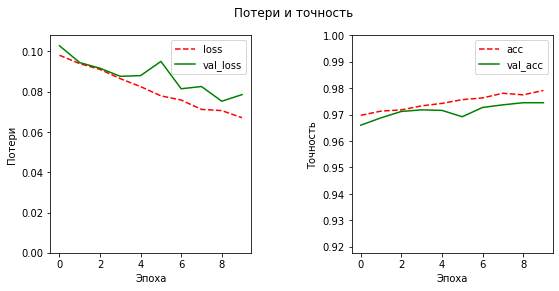

In [33]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()

In [34]:
pred_1 = model.predict(x_train)
pred_1 = np.argmax(pred_1, axis=1)

In [35]:
y_test = np.argmax(y_test, axis=1)

In [36]:
y_train = np.argmax(y_train, axis=1)

In [37]:
y_train[0]

5

In [38]:
acc_1 = y_train[y_train == pred_1].shape[0] / y_train.shape[0]

In [39]:
print(acc_1 * 100)

97.96000000000001


In [40]:
pred_2 = model.predict(x_test)
pred_2 = np.argmax(pred_2, axis=1)

In [41]:
acc_2 = y_test[y_test == pred_2].shape[0] / y_test.shape[0]


In [42]:
print(acc_2 * 100)

97.45


In [43]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [44]:
print(y_train[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [45]:
y_test_classes = [0] * num_classes
y_test_true = [0] * num_classes
for i in range(y_test.shape[0]):
  y_test_classes[y_test[i]] += 1
  if y_test[i] == pred_2[i]:
    y_test_true[y_test[i]] += 1

In [46]:
y_test_classes

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [47]:
y_test_true

[958, 1129, 1000, 980, 954, 879, 939, 983, 953, 970]

In [48]:
print("Test: \n")
for i in range(num_classes):
  print("acc ", i, " - ", format((y_test_true[i] * 100) / y_test_classes[i], '.2f') )

Test: 

acc  0  -  97.76
acc  1  -  99.47
acc  2  -  96.90
acc  3  -  97.03
acc  4  -  97.15
acc  5  -  98.54
acc  6  -  98.02
acc  7  -  95.62
acc  8  -  97.84
acc  9  -  96.13


In [49]:
y_train_classes = [0] * num_classes
y_train_true = [0] * num_classes
for i in range(y_train.shape[0]):
  y_train_classes[y_train[i]] += 1
  if y_train[i] == pred_1[i]:
    y_train_true[y_train[i]] += 1

In [50]:
y_train_classes

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [51]:
y_train_true

[5819, 6711, 5783, 5939, 5719, 5368, 5831, 6117, 5719, 5770]

In [52]:
print("Train: \n")
for i in range(num_classes):
  print("acc ", i, " - ", format((y_train_true[i] * 100) / y_train_classes[i], '.2f') )

Train: 

acc  0  -  98.24
acc  1  -  99.54
acc  2  -  97.06
acc  3  -  96.87
acc  4  -  97.89
acc  5  -  99.02
acc  6  -  98.53
acc  7  -  97.64
acc  8  -  97.74
acc  9  -  96.99
